# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [141]:
# Import the appropriate libraries with aliases

import pandas as pd 
import numpy as np

# Create two new dataframes

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [142]:
# EDA Question 1A solution below:
north_df.head()
north_rep_counts = north_df.value_counts('Rep ID')
north_rep_counts.count()
# There are 9 Reps in the North branch 

np.int64(9)

#### EDA Question 1B:  How many reps are in the South branch?  

In [143]:
# EDA Question 1B solution Below:
south_df.head()
south_rep_counts = south_df.value_counts('Rep ID')
south_rep_counts.count()
# Thre are 11 reps in the South branch 

np.int64(11)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [144]:
# EDA Question 2A solution Below:
# Average busy minutes (along) for the North branch

#Busy Minutes = 
#Not Ready Minutes = 
#Incoming Wait Time = 
#During Call Wait Time = 

avg_busyminutes_north = north_df.agg({
    'Busy Minutes': 'mean',
    'Not Ready Minutes': 'mean',
    'Incoming Wait Time': 'mean',
    'During Call Wait Time': 'mean'
}).round(decimals=2)

print(avg_busyminutes_north)


Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [145]:
# EDA Question 2B solution Below:
avg_busyminutes_south = south_df.agg({
    'Busy Minutes': 'mean',
    'Not Ready Minutes': 'mean',
    'Incoming Wait Time': 'mean',
    'During Call Wait Time': 'mean'
}).round(decimals=2)


print(avg_busyminutes_south)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [146]:
# EDA Question 3 solution Below:
# number of calls taken for each time block 
#sum of calls for each time block, add between the two branches 


time_blocks = list((north_df["Time Block"]).unique())

time_blocks.sort()

for t in time_blocks:
    north_sum = north_df.loc[north_df["Time Block"] == t, "Calls"].sum()
    south_sum = south_df.loc[south_df["Time Block"] == t, "Calls"].sum()
    total_sum = north_sum + south_sum
    print(f"{t} = {total_sum}")




# 9:00AM   = 
# 10:00AM  = 
# 11:00AM  = 
# 12:00PM  = 
# 1:00PM   = 
# 2:00PM   = 
# 3:00PM   = 
# 4:00PM   = 
# 5:00PM   = 




10:00 AM = 99
11:00 AM = 56
12:00 PM = 120
1:00 PM = 40
2:00 PM = 65
3:00 PM = 73
4:00 PM = 53
5:00 PM = 43
9:00 AM = 10


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = There are 9 Reps in the North branch 
- 1b) Reps in the South Branch = There are 11 reps in the South branch 


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97

- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08

- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [147]:
south_df = south_df.rename(columns=lambda x:x.lower().replace(' ', '_'))

south_df.head()

,unnamed:_0,branch,call_purpose,time_block,incoming_or_outgoing,queue,rep_id,sale,lost_call,abandoned,busy_minutes,not_ready_minutes,incoming_wait_time,during_call_wait_time,calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


*I wanted to clean the header formatting to be lower cased and have underscores instead of spaces. I think this will help with cleaning and data manipulation.*

In [148]:
# Question 1 solution below

south_df.head()
south_df.info()
south_df.describe()
south_df.isnull().sum() #188 null values in "Incoming Wait Time"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unnamed:_0             314 non-null    int64  
 1   branch                 314 non-null    object 
 2   call_purpose           314 non-null    object 
 3   time_block             314 non-null    object 
 4   incoming_or_outgoing   314 non-null    object 
 5   queue                  314 non-null    object 
 6   rep_id                 314 non-null    object 
 7   sale                   314 non-null    object 
 8   lost_call              314 non-null    int64  
 9   abandoned              314 non-null    int64  
 10  busy_minutes           314 non-null    int64  
 11  not_ready_minutes      314 non-null    int64  
 12  incoming_wait_time     126 non-null    float64
 13  during_call_wait_time  314 non-null    int64  
 14  calls                  314 non-null    int64  
dtypes: flo

unnamed:_0                 0
branch                     0
call_purpose               0
time_block                 0
incoming_or_outgoing       0
queue                      0
rep_id                     0
sale                       0
lost_call                  0
abandoned                  0
busy_minutes               0
not_ready_minutes          0
incoming_wait_time       188
during_call_wait_time      0
calls                      0
dtype: int64

In [149]:
north_df = north_df.rename(columns=lambda x:x.lower().replace(' ', '_'))
north_df.head()


,unnamed:_0,branch,call_purpose,time_block,incoming_or_outgoing,queue,rep_id,sale,lost_call,abandoned,busy_minutes,not_ready_minutes,incoming_wait_time,during_call_wait_time,calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [150]:
north_df.head()
north_df.info()
north_df.describe()
north_df.isnull().sum() #163 null values in "Incoming Wait Time"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unnamed:_0             245 non-null    int64  
 1   branch                 245 non-null    object 
 2   call_purpose           245 non-null    object 
 3   time_block             245 non-null    object 
 4   incoming_or_outgoing   245 non-null    object 
 5   queue                  245 non-null    object 
 6   rep_id                 245 non-null    object 
 7   sale                   245 non-null    object 
 8   lost_call              245 non-null    int64  
 9   abandoned              245 non-null    int64  
 10  busy_minutes           245 non-null    int64  
 11  not_ready_minutes      245 non-null    int64  
 12  incoming_wait_time     82 non-null     float64
 13  during_call_wait_time  245 non-null    int64  
 14  calls                  245 non-null    int64  
dtypes: flo

unnamed:_0                 0
branch                     0
call_purpose               0
time_block                 0
incoming_or_outgoing       0
queue                      0
rep_id                     0
sale                       0
lost_call                  0
abandoned                  0
busy_minutes               0
not_ready_minutes          0
incoming_wait_time       163
during_call_wait_time      0
calls                      0
dtype: int64

In [151]:
south_df.nunique()

unnamed:_0               314
branch                     1
call_purpose               3
time_block                 9
incoming_or_outgoing       2
queue                      2
rep_id                    11
sale                       2
lost_call                  2
abandoned                  2
busy_minutes               5
not_ready_minutes          3
incoming_wait_time         5
during_call_wait_time      3
calls                      1
dtype: int64

In [152]:
north_df.nunique()
#south_df.nunique()

unnamed:_0               245
branch                     1
call_purpose               3
time_block                 9
incoming_or_outgoing       2
queue                      2
rep_id                     9
sale                       3
lost_call                  2
abandoned                  2
busy_minutes               5
not_ready_minutes          3
incoming_wait_time         5
during_call_wait_time      3
calls                      1
dtype: int64

#### Record your answer below:
Is there any missing data and if yes explain what you would do with the missing data and why?

> Your Answer: Yes, there is missing data. For both branches there are NaN values for "incoming_wait_time" - I believe these actually represent "outgoing calls", but that is not explicitly referenced in the data

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [153]:
north_df["sale"].value_counts()

sale
NO      234
YES      10
YES       1
Name: count, dtype: int64

In [154]:
north_df["sale"] = north_df["sale"].str.strip()
north_df["sale"].value_counts()

sale
NO     234
YES     11
Name: count, dtype: int64

##### Record your answer by below:
In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
> Your Answer: There were two "YES" values because one YES accidentally had a trailing " ". I removed this space with the strip method .str.strip() and it resulted in only two unique values in that column, YES and NO. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [155]:
# Cleaning Question 3 solution below:

south_dupes = south_df.duplicated()
print(south_dupes)

south_dupes_rows = south_df[south_df.duplicated(keep=False)]
print(south_dupes_rows)


0      False
1      False
2      False
3      False
4      False
       ...  
309    False
310    False
311    False
312    False
313    False
Length: 314, dtype: bool
Empty DataFrame
Columns: [unnamed:_0, branch, call_purpose, time_block, incoming_or_outgoing, queue, rep_id, sale, lost_call, abandoned, busy_minutes, not_ready_minutes, incoming_wait_time, during_call_wait_time, calls]
Index: []


In [156]:
north_dupes = north_df.duplicated()
print(north_dupes)

north_dupes_rows = north_df[north_df.duplicated(keep=False)]
print(north_dupes_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool
Empty DataFrame
Columns: [unnamed:_0, branch, call_purpose, time_block, incoming_or_outgoing, queue, rep_id, sale, lost_call, abandoned, busy_minutes, not_ready_minutes, incoming_wait_time, during_call_wait_time, calls]
Index: []


##### Record your answer below:
Are there duplicates in the two data sets? If there are, how did you handle them?
> Your Answer: There are no duplicate rows in the two datasets. For each dataset, I utilized .duplicated to identify duplicate rows. I then used (keep=False) to return any rows that may be duplicates that I couldn't see in the truncated results. For both the North and South branch, there are no duplicate rows. 

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [157]:
# Cleaning Question 4 solution below:

#north_df.nunique()
#north_df = north_df.drop(columns=["calls"])
#north_df.nunique()



In [158]:
#south_df.nunique()
#south_df = south_df.drop(columns=["calls"])
#south_df.nunique()


##### Record your answer below:
Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
> Your Answer: the columns 'calls" is unnecessary because it will always be a count of one. each row represents one call, so to capture the "calls" quantity for each row will always be one. Thus, "calls" is a column we can eliminate with no consequences EDIT: In the Data Manipulation section, the "calls" column is necessary to calculate a sum of calls for reps, so I am undoing the dropping of the column! 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [159]:
# Create dataframe for the entire company named df
south_df.head()


,unnamed:_0,branch,call_purpose,time_block,incoming_or_outgoing,queue,rep_id,sale,lost_call,abandoned,busy_minutes,not_ready_minutes,incoming_wait_time,during_call_wait_time,calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [160]:
north_df.head()

,unnamed:_0,branch,call_purpose,time_block,incoming_or_outgoing,queue,rep_id,sale,lost_call,abandoned,busy_minutes,not_ready_minutes,incoming_wait_time,during_call_wait_time,calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [161]:
df = pd.merge(north_df, south_df, how="outer")
df.nunique()

unnamed:_0               314
branch                     2
call_purpose               3
time_block                 9
incoming_or_outgoing       2
queue                      4
rep_id                    20
sale                       2
lost_call                  2
abandoned                  2
busy_minutes               5
not_ready_minutes          3
incoming_wait_time         5
during_call_wait_time      3
calls                      1
dtype: int64

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [162]:
# Manipulation Question solution below:

df = df.rename(columns={"unnamed:_0" : "call_id"})

#rep_group = df.groupby("rep_id").sum(int) - this sums the call_id, it does not COUNT the call id
rep_group = df.groupby("rep_id").sum(int).sort_values("calls", ascending=False)
rep_group.head()
# Brent - 37
# Eric - 35
# Randy - 33
# Sandy - 32
# Helga - 31

df.head()
# Brent - 37 (North)
# Eric - 35 (South)

,call_id,branch,call_purpose,time_block,incoming_or_outgoing,queue,rep_id,sale,lost_call,abandoned,busy_minutes,not_ready_minutes,incoming_wait_time,during_call_wait_time,calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
2,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
3,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
4,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent
- South Branch = Eric

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [163]:
# Manipulation Question 2 solution below:
# Mean abandoned call rate (our of all calls, on average how many are abandoned): North, South, Whole Company

df.sum()
# 11 abandoned calls for the entire company
# 1693 total calls for the company 

company_abandoned = np.round(1693/11, 2)
print(company_abandoned) #153. For the entire company, 1 in 153 calls on average are abandoned 

south_df.sum()
# 4 abandonded calls
# 314 Calls
south_abandonded = np.round(314/4, 2)
print(south_abandonded) #On average, 1 in every 78 calls in the South Branch are abandonded 

north_df.sum()
# 7 abandonded calls
# 245 calls
north_abandonded = np.round(245/7, 2)
print(north_abandonded) # On average, 1 in every 35 calls are abandonded in the North Branch


# Percent Rate 
comp_float = np.round(11/1693, 2)
comp_percentage = comp_float * 100
print("Company rate is:") 
print(comp_percentage)

south_float = np.round(4/314, 2)
south_percentage = south_float * 100
print("South rate is:") 
print(south_percentage)

north_float = np.round(7/245, 2)
north_percentage = north_float * 100
print("North rate is:") 
print(north_percentage)



153.91
78.5
35.0
Company rate is:
1.0
South rate is:
1.0
North rate is:
3.0


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 35.0 
- South Branch = 78.5
- Company Wide = 153.91 
- Do any of these fall out of the optimal range of 2-5%? Yes, the Company and South rate both are below 2 percent. I'm not sure if that honors the premise of this question, but those two branches have an abandonment rate of 1% which is technically outside of the 2-5% range 

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [164]:
# Manipulation Question 3 solution below:
#incoming wait time

#print(df["incoming_wait_time"]) #This correctly ptins the whole column
#The issue is I need a sum of all the incoming wait times in order to calculate the percentage of calls answered within (less than) 2 seconds. However, the "incoming_wait_time" column is full of floats and NaNs, so it's not letting me sum 


df["incoming_wait_time"].value_counts()
#4.0    50
#2.0    44
#3.0    41
#1.0    37
#5.0    36
#Total of 208 values (the actual calls)

all_incoming = 37/208
percent_all_incoming = round(all_incoming * 100)
print(percent_all_incoming)



south_df["incoming_wait_time"].value_counts()
#4.0    30
#3.0    29
#2.0    28
#1.0    20
#5.0    19
# Total of 126 values (actual calls)

south_incoming = 20/126
percentage_south_incoming = round(south_incoming * 100)
print(percentage_south_incoming)

north_df["incoming_wait_time"].value_counts()
#4.0    20
#1.0    17
#5.0    17
#2.0    16
#3.0    12
# Total of 82 values (actual calls)

north_incoming = 17/82
percentage_north_incoming = round(north_incoming * 100)
print(percentage_north_incoming)


18
16
21


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 21% of all calls are answered within 2 seconds
- South Branch = 16% of all calls are answered within 2 seconds
- Company Wide = 18% of all calls are answered within 2 seconds

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [165]:
# Manipulation Question 4 solution below:
df.head()
df["incoming_wait_time"].value_counts()
# sum of all wait times ??

all_speed = (df["incoming_wait_time"]).sum(skipna=True)
all_speed = pd.to_numeric(all_speed, errors='coerce')
print(all_speed)
#Sum of all incoming wait times is 628 

south_speed = (south_df["incoming_wait_time"]).sum(skipna=True)
south_speed = pd.to_numeric(south_speed, errors='coerce')
print(south_speed)
#Sum of all South incoming wait times is 378

north_speed = (north_df["incoming_wait_time"]).sum(skipna=True)
north_speed = pd.to_numeric(north_speed, errors='coerce')
print(north_speed)
#Sum of all North incoming waiting times is 250 

#average speed of answer is wait times divided by calls 

all_wait_time = 628
all_calls = 208
all_average = round(628/208, 2)
print(all_average)
# average speed of answer for all company is 3.02 seconds per call 

south_wait_time = 378
south_calls = 126
south_average = round(378/126, 2)
print(south_average)
#average speed of answer for south branch is 3 seconds per call 


north_wait_time = 250
north_calls = 82
north_average = round(250/82, 2)
print(north_average)
#average speed of answer for south branch is 3.05 seconds per call 





628.0
378.0
250.0
3.02
3.0
3.05


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 Seconds
- South Branch in seconds = 3 Seconds
- Company Wide in seconds = 3.02 Seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/g4/550p82m54xdf5rq91jf5k2sh0000gn/T/ipykernel_47675/426227994.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = (queue_dict["abandoned"][i] / queue_dict["calls"][i]) * 100


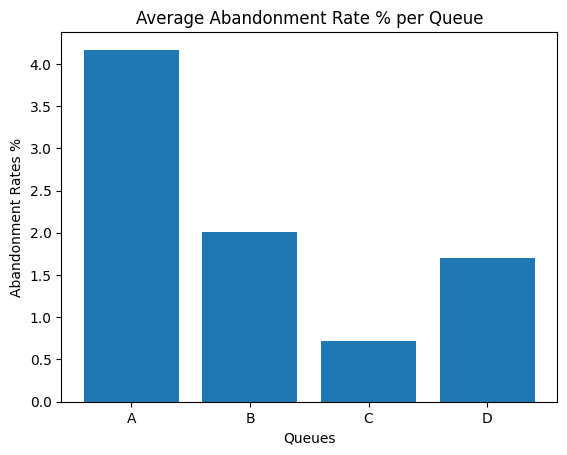

In [166]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt 

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["abandoned"][i] / queue_dict["calls"][i]) * 100

keys = list(abandonment_rates.keys())
vals = list(abandonment_rates.values())

#Your code below:
plt.bar( x=keys, height=vals)
plt.title("Average Abandonment Rate % per Queue")
plt.xlabel("Queues")
plt.ylabel("Abandonment Rates %")
plt.show()



##### Record your answer below:

> Chart style you chose and why: 
I chose a column chart because I am using the chart for comparison: comparing the average call abandonment rate across the 4 queues. 4 is a small number, so the column chart was more effective and clearner than a bar chart (horizontal). Additionally, because I am only assessing on variable instead of many, I opted for the singular column chart instead of a table or table with embedded charts. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

In [186]:
# Create visualization 2 here
#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("rep_id")["incoming_wait_time"].mean().to_frame().reset_index()
#Provides 9 reps and their average incoming wait time

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["incoming_wait_time"] <= 2.0]
quick_reps = quick_calls[["rep_id", "calls"]]
quick_stats = quick_reps.groupby(["rep_id"]).sum()  # Final Table
#Provides NINE reps 

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["incoming_or_outgoing"] == "incoming"]
rep_calls = total_calls_in[["rep_id", "calls"]]     
total_stats = rep_calls.groupby(["rep_id"]).sum() # Final Table  


#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="rep_id")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["calls_x"]/service_level["calls_y"] * 100
#Your Code Here:



# plot_data = pd.merge(north_plt, service_level, on="rep_id", how='inner')

x_data = north_plt["incoming_wait_time"].values
y_data = service_level["Service Level %"].values
# reps = north_plt["rep_id"]

print(y_data)

# plt.figure(figsize=(8, 6))
# plt.scatter(x_data, y_data, s=100, alpha=0.6, color = 'limegreen')

# for i, rep in enumerate(reps):
#     plt.annotate(reps, (x_data[i], y_data[i]), fontsize=9, ha='right')

# plt.title("Service Level % vs Average Speed of Answer (North Branch)")
# plt.xlabel("Average Speed of Answer (seconds)")
# plt.ylabel("Service Level %")
# plt.grid(True, alpha=0.3)
# plt.show()

print(len(x_data))
print(len(y_data))

[]
9
0


IndexError: index 0 is out of bounds for axis 0 with size 0

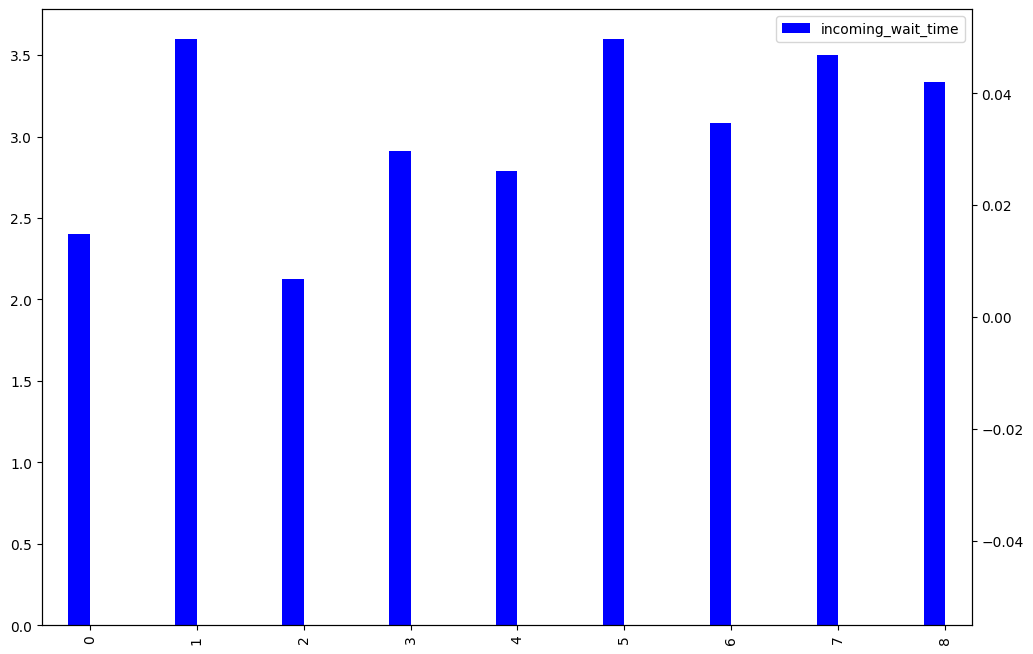

In [ ]:
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("rep_id")["incoming_wait_time"].mean().to_frame().reset_index()
#Provides 9 reps and their average incoming wait time

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["incoming_wait_time"] <= 2.0]
quick_reps = quick_calls[["rep_id", "calls"]]
quick_stats = quick_reps.groupby(["rep_id"]).sum()  # Final Table
#Provides NINE reps 

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["incoming_or_outgoing"] == "incoming"]
rep_calls = total_calls_in[["rep_id", "calls"]]     
total_stats = rep_calls.groupby(["rep_id"]).sum() # Final Table  


#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="rep_id")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["calls_x"]/service_level["calls_y"] * 100
#Your Code Here:

service_level["Service Level %"]

x_data = north_plt["incoming_wait_time"].values
y_data = service_level["Service Level %"].values
reps = north_plt["rep_id"]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.2

north_plt.plot(kind='bar', color='blue', ax=ax, width=width, position=1)
service_level["Service Level %"].plot(kind='bar', color='orange', ax=ax2, width=width, position=0)

ax.set_ylabel('incoming_wait_time',color = 'black', fontsize = 16, fontweight = 'bold')
ax2.set_ylabel('Service Level %',color = 'black', fontsize = 16, fontweight = 'bold')

plt.title('Incoming Wait Times and Service Level %', color = 'black', fontsize = 20, fontweight = 'bold')

plt.show()


In [168]:
print(north_plt) #average speed of answer of each rep 

   rep_id  incoming_wait_time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333


##### Record your answer below:

> Chart style you chose and why: 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

In [169]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

#This one is going to be doubel column chart (See grouped bar chart example from data viz exercise)

purpose_group = df.groupby("call_purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["incoming_or_outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

x = np.arange(len(call_purpose))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for 


#Your Code Here:


SyntaxError: invalid syntax (1722511690.py, line 21)

##### Record your answer below:

> Chart style you chose and why: 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined